In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
import shutil
import numpy as np
from sklearn.model_selection import train_test_split

# مسیر دیتاست در گوگل درایو
data_dir = '/content/drive/My Drive/data'
yes_dir = os.path.join(data_dir, 'Yes')
no_dir = os.path.join(data_dir, 'No')

# مسیرهای جدید برای آموزش و آزمون
base_dir = '/content/drive/My Drive/data'
train_dir = os.path.join(base_dir, 'train')
test_dir = os.path.join(base_dir, 'test')

os.makedirs(os.path.join(train_dir, 'Yes'), exist_ok=True)
os.makedirs(os.path.join(train_dir, 'No'), exist_ok=True)
os.makedirs(os.path.join(test_dir, 'Yes'), exist_ok=True)
os.makedirs(os.path.join(test_dir, 'No'), exist_ok=True)

In [ ]:
yes_images = [os.path.join(yes_dir, f) for f in os.listdir(yes_dir) if os.path.isfile(os.path.join(yes_dir, f))]
no_images = [os.path.join(no_dir, f) for f in os.listdir(no_dir) if os.path.isfile(os.path.join(no_dir, f))]

yes_train, yes_test = train_test_split(yes_images, test_size=0.2, random_state=42)
no_train, no_test = train_test_split(no_images, test_size=0.2, random_state=42)


In [ ]:
# انتقال تصاویر به پوشه‌های آموزش
for file in yes_train:
    shutil.copy(file, os.path.join(train_dir, 'Yes'))

for file in no_train:
    shutil.copy(file, os.path.join(train_dir, 'No'))

# انتقال تصاویر به پوشه‌های آزمون
for file in yes_test:
    shutil.copy(file, os.path.join(test_dir, 'Yes'))

for file in no_test:
    shutil.copy(file, os.path.join(test_dir, 'No'))

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Found 202 images belonging to 2 classes.
Found 51 images belonging to 2 classes.


Model: "functional_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_4             │ (None, 150, 150, 3)    │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1_conv1 (Conv2D)     │ (None, 74, 74, 32)     │            864 │ input_layer_4[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1_conv1_bn           │ (None, 74, 74, 32)     │            128 │ block1_conv1[0][0]     │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1_conv1_act          │ (None, 74, 74, 32)     │              0 │ block1_conv1_bn[0][0]  │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1_conv2 (Conv2D)     │ (None, 72, 72, 64)     │         18,432 │ block1_conv1_act[0][0] │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1_conv2_bn           │ (None, 72, 72, 64)     │            256 │ block1_conv2[0][0]     │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1_conv2_act          │ (None, 72, 72, 64)     │              0 │ block1_conv2_bn[0][0]  │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block2_sepconv1           │ (None, 72, 72, 128)    │          8,768 │ block1_conv2_act[0][0] │
│ (SeparableConv2D)         │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block2_sepconv1_bn        │ (None, 72, 72, 128)    │            512 │ block2_sepconv1[0][0]  │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block2_sepconv2_act       │ (None, 72, 72, 128)    │              0 │ block2_sepconv1_bn[0]… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block2_sepconv2           │ (None, 72, 72, 128)    │         17,536 │ block2_sepconv2_act[0… │
│ (SeparableConv2D)         │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block2_sepconv2_bn        │ (None, 72, 72, 128)    │            512 │ block2_sepconv2[0][0]  │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_4 (Conv2D)         │ (None, 36, 36, 128)    │          8,192 │ block1_conv2_act[0][0] │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block2_pool               │ (None, 36, 36, 128)    │              0 │ block2_sepconv2_bn[0]… │
│ (MaxPooling2D)            │                        │                │                        │
├──────────────────────

 Total params: 21,386,281 (81.58 MB)

 Trainable params: 524,801 (2.00 MB)

 Non-trainable params: 20,861,480 (79.58 MB)

Epoch 1/30
13/13 ━━━━━━━━━━━━━━━━━━━━ 18s 791ms/step - accuracy: 0.4721 - loss: 0.8897 - val_accuracy: 0.6078 - val_loss: 0.6418
Epoch 2/30
13/13 ━━━━━━━━━━━━━━━━━━━━ 11s 172ms/step - accuracy: 0.6727 - loss: 0.5822 - val_accuracy: 0.7647 - val_loss: 0.5069
Epoch 3/30
13/13 ━━━━━━━━━━━━━━━━━━━━ 4s 108ms/step - accuracy: 0.8562 - loss: 0.4728 - val_accuracy: 0.8235 - val_loss: 0.4315
Epoch 4/30
13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 100ms/step - accuracy: 0.8354 - loss: 0.4284 - val_accuracy: 0.8235 - val_loss: 0.3809
Epoch 5/30
13/13 ━━━━━━━━━━━━━━━━━━━━ 3s 100ms/step - accuracy: 0.8323 - loss: 0.4207 - val_accuracy: 0.8431 - val_loss: 0.3731
Epoch 6/30
13/13 ━━━━━━━━━━━━━━━━━━━━ 3s 153ms/step - accuracy: 0.8475 - loss: 0.3808 - val_accuracy: 0.8235 - val_loss: 0.3706
Epoch 7/30
13/13 ━━━━━━━━━━━━━━━━━━━━ 5s 113ms/step - accuracy: 0.8392 - loss: 0.3635 - val_accuracy: 0.8431 - val_loss: 0.3421
Epoch 8/30
13/13 ━━━━━━━━━━━━━━━━━━━━ 3s 115ms/step - accuracy: 0.8769 - loss: 0.3232 - val_accuracy: 

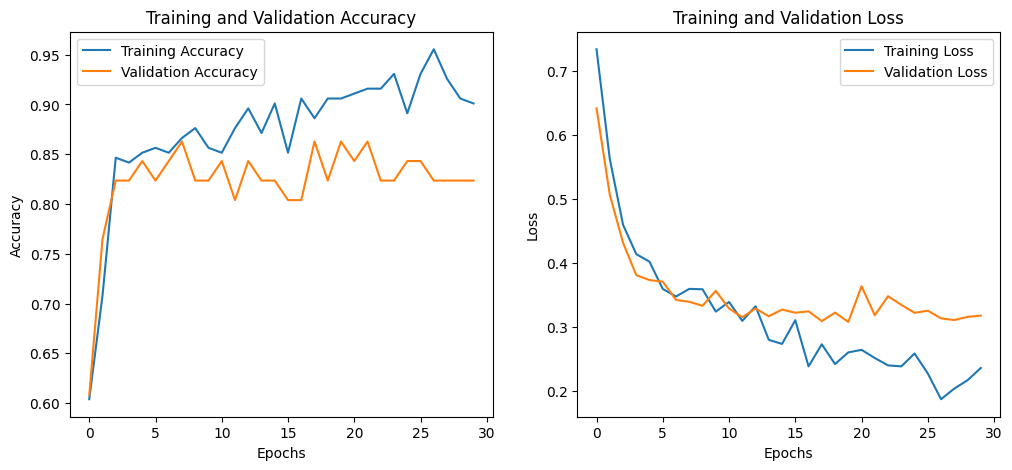

In [ ]:
import os
import shutil
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split

# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Paths
data_dir = '/content/drive/My Drive/data'
yes_dir = os.path.join(data_dir, 'Yes')
no_dir = os.path.join(data_dir, 'No')

base_dir = '/content/drive/My Drive/data'
train_dir = os.path.join(base_dir, 'train')
test_dir = os.path.join(base_dir, 'test')

os.makedirs(os.path.join(train_dir, 'Yes'), exist_ok=True)
os.makedirs(os.path.join(train_dir, 'No'), exist_ok=True)
os.makedirs(os.path.join(test_dir, 'Yes'), exist_ok=True)
os.makedirs(os.path.join(test_dir, 'No'), exist_ok=True)

# Collect images
yes_images = [os.path.join(yes_dir, f) for f in os.listdir(yes_dir) if os.path.isfile(os.path.join(yes_dir, f))]
no_images = [os.path.join(no_dir, f) for f in os.listdir(no_dir) if os.path.isfile(os.path.join(no_dir, f))]

# Split images into training and testing
yes_train, yes_test = train_test_split(yes_images, test_size=0.2, random_state=42)
no_train, no_test = train_test_split(no_images, test_size=0.2, random_state=42)

# Move images to respective directories
def move_files(file_list, target_dir):
    for file in file_list:
        shutil.copy(file, target_dir)

move_files(yes_train, os.path.join(train_dir, 'Yes'))
move_files(no_train, os.path.join(train_dir, 'No'))
move_files(yes_test, os.path.join(test_dir, 'Yes'))
move_files(no_test, os.path.join(test_dir, 'No'))

# Data augmentation and preprocessing
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=16,
    class_mode='binary'
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(150, 150),
    batch_size=16,
    class_mode='binary'
)

# Model definition (e.g., using Xception)
base_model = tf.keras.applications.Xception(
    include_top=False,
    weights='imagenet',
    input_shape=(150, 150, 3)
)

x = base_model.output
x = tf.keras.layers.GlobalAveragePooling2D()(x)
x = tf.keras.layers.Dropout(0.2)(x)
x = tf.keras.layers.Dense(256, activation='relu')(x)
x = tf.keras.layers.Dropout(0.2)(x)
predictions = tf.keras.layers.Dense(1, activation='sigmoid')(x)

model = tf.keras.Model(inputs=base_model.input, outputs=predictions)

# Freeze base model layers
for layer in base_model.layers:
    layer.trainable = False

# Compile the model
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
    loss='binary_crossentropy',
    metrics=['accuracy']
)

# Display the model summary
model.summary()

# Train the model
history = model.fit(
    train_generator,
    validation_data=test_generator,
    epochs=30
)

# Plot the training and validation accuracy and loss
plt.figure(figsize=(12, 5))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()

plt.show()
